<h1>빗물 채우기</h1>
<p>leetcode 42번 [링크](https://leetcode.com/problems/trapping-rain-water/)</p>
<p>(참고)BEAKJOON 14719번 [링크](https://www.acmicpc.net/problem/14719)</p>
<br>
<br>
<h2>문제</h2>
<p>2차원 공간에 너비가 1인 막대들이 세로로 놓여져있다.<br>
막대들의 높이를 기록한 배열이 주어졌을 때, 이 공간에 비가 내린 뒤 물이 얼마나 고일지 계산하라.</p>

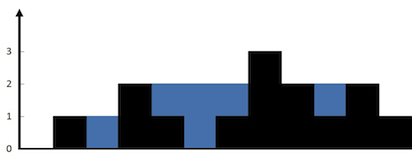

<h2>INPUT</h2>
<p>정수로 이루어진 배열 height를 입력받는다.</p>
<h2>OUTPUT</h2>
<p>고인 빗물의 총량을 정수로 반환한다.</p>
<br>
<h2>입출력 예시</h2>
<p>
Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]<br>
Output: 6<br>
<br>
Input: height = [4,2,0,3,2,5]<br>
Output: 9<br>
</p>
<br>
<h2>제약조건</h2>
<p>
1 <= n <= 2 * 10^4 (n = len(height))<br>
0 <= height[i] <= 10^5<br>
</p>
<br>
<br>

<h1>0.완전 탐색을 이용한 풀이</h1>

<p>모든 막대를 차례로 살펴본다면 O(n^2)의 시간복잡도에 풀이가 가능하다. 그러나 시간복잡도가 너무 높기 때문에 Time Limit Exceeded가 발생하는 것을 확인할 수 있다.</p>

In [ ]:
# 아래 모듈은 leetcode 에디터에 이미 import 되어있다.
# Time Limit Exceeded
from typing import *


class Solution:
    def trap(self, height: List[int]) -> int:
        # 예외 조건
        if not height:
            return 0

        volume = 0
        n = len(height)

        for i in range(n):
            # height[i]기준 좌우 기둥의 높이 최대값
            left_max = 0
            right_max = 0
            # height[0] ~ height[i] 까지 비교하여 가장 높은 높이를 저장
            for j in range(i, -1, -1):
                left_max = max(left_max, height[j])
            # height[i] ~ height[n] 까지 비교하여 가장 높은 높이를 저장
            for j in range(i, n):
                right_max = max(right_max, height[j])

            # height[i]에서의 수면의 높이는 left_max, right_max 중 더 낮은 기둥의 높이와 같다.
            volume += min(left_max, right_max) - height[i]

        return volume


<h1>1.투 포인터를 이용한 풀이</h1>

<p>앞의 풀이에서 left_max값과 right_max값을 투 포인터를 이용하여 구해보자.<br>
주어진 배열의 양 끝을 left와 right로 두고, 두 포인터 중 높이가 더 낮은 포인터를 반대쪽으로 1씩 이동시킨다.<br>
이 때 만약 오른쪽 포인터에서의 높이가 더 높다면, 수면의 높이는 left_max를 기준으로 형성되므로 이동시킬 포인터의 위치(left)에서의 물의 부피(높이)는 left_max - height[left]로 구할 수 있다.<br>
왼쪽 포인터에서의 높이가 더 높을 때도 같은 방법으로 물의 부피를 구할 수 있고, 두 포인터가 만날때까지 이 과정을 반복해주면된다.<br>
따라서 O(n)의 시간복잡도에 풀이가 가능하다.
</p>

In [ ]:
# leetcode는 아래 모듈들을 미리 import함
# 메모리 : 15.8 MB
# 시간 : 107 ms
from typing import *


class Solution:
    def trap(self, height: List[int]) -> int:
        # 예외 조건
        if not height:
            return 0

        volume = 0
        left, right = 0, len(height) - 1
        left_max, right_max = height[left], height[right]

        while left < right:
            left_max, right_max = max(height[left], left_max), max(height[right], right_max)
            # 더 높은 쪽으로 포인터 이동
            if left_max <= right_max:
                # 완전 탐색 풀이에서의 volume += min(left_max, right_max) - height[i]와 같다.
                volume += left_max - height[left]
                left += 1
            else:
                # 반대의 경우도 같은 매커니즘을 반복한다.
                volume += right_max - height[right]
                right -= 1

        return volume


<h1>2.스택을 이용한 풀이</h1>

<p>반복문을 이용해 i값을 차례로 스택(stack)에 저장하면서 현재 저장할 높이(height[i])와 이전 높이(height[stack[-1]])를 비교한다.<br>
만약 현재의 높이가 이전의 높이보다 높아진다면, stack에서 마지막값을 하나씩 꺼내면서 이전과의 차이만큼 물을 채워나간다.<br>
이전의 풀이들이 물의 부피를 i의 위치에서의 물의 양을 더하는 식으로 구했다면, 이 풀이는 i와 그와 가장 가까운 좌우 변곡점들이 만드는 물 웅덩이를 차례로 더하는 식으로 물의 부피를 구한다는 차이가 있다.<br>
이 풀이 또한 O(n)의 시간복잡도에 풀이가 가능하다.
</p>

In [ ]:
# leetcode는 아래 모듈들을 미리 import함
# 메모리 : 15.8 MB
# 시간 : 87 ms
from typing import *


class Solution:
    def trap(self, height: List[int]) -> int:
        stack = []
        volume = 0

        for i in range(len(height)):
            # 스택에 값이 있을 때, 이전 위치(stack[-1])의 높이가 현재의 높이(height[i])를 비교
            while stack and height[i] > height[stack[-1]]:
                top = stack.pop()
                # 만약 pop한 후의 stack이 비어있다면 distance가 0이므로 바로 반복문을 탈출한다.
                if not len(stack):
                    break
                # water는 수면의 높이와 top의 높이의 차를 나타낸다., 
                water = min(height[i], height[stack[-1]]) - height[top]
                # water높이만큼의 물이 얼마나 넓게 고여있는지를 확인한다.
                distance = i - stack[-1] - 1
                # 결과값에 앞에서 구한 물의 부피를 더해준다.
                volume += distance * water
            # 스택에 i값 저장
            stack.append(i)

        return volume
